In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

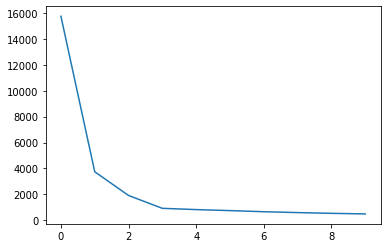

In [3]:
## inertia is sum of squared distance for each point to its closest centroid

wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(wcss)    


## from this we think 3 is the best number of clusters

In [4]:
cluster = KMeans(n_clusters=3)
cluster_labels = cluster.fit_predict(X)
print(cluster_labels)

[0 0 2 1 2 1 2 2 2 2 0 0 2 1 2 0 2 0 1 2 2 2 2 1 2 2 1 1 2 2 0 1 2 0 2 0 2
 2 0 2 2 2 1 2 2 0 2 2 1 1 1 2 2 2 0 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2 2 0
 2 2 0 2 2 2 1 1 2 1 1 2 2 1 2 2 1 0 2 2 1 0 0 2 0 1 1 0 1 2 1 2 2 1 1 2 2
 0 1 2 1 2 1 2 1 2 2 0 0 2 2 2 1 0 0 2 1 2 2 2 2 0 1 2 1 1 2 0 2 1 1 1 2 2
 0 0 2 2 1 0 1 2 2 2 2 2 2 2 2 2 1 0 0 0 2 1 0 2 2 0 1 2 2 2 2 0 2 2 1 0 0
 2 2 0 0 2 1 1 0 0 2 1 2 0 0 1 0 2 1 2 2 0 2 2 0 2 2 2 2 0 2 2 2 1 2 1 2 0
 2 2 2 2 2 1 2 1 0 2 0 2 1 1 2 0 1 0 2 2 0 0 0 0 2 2 0 2 2 1 1 2 2 1 2 2 2
 1 2 1 2 2 1 2 0 0 2 2 2 2 1 1 2 1 2 0 1 0 1 0 0 1 0 1 1 2 2 2 2 2 2 2 0 1
 0 0 0 2 2 2 0 2 0 0 2 0 0 2 1 0 2 2 1 1 2 0 1 1 2 0 1 1 2 2 1 2 2 0 0 1 2
 0 2 1 1 2 2 2 0 2 1 1 2 1 1 1 1 0 0 2 1 2 2 0 1 2 1 2 1 2 2 2 1 2 2 0 1 0
 0 0 0 0 0 2 0 1 0 1 1 2 1 2 2 2 0 1 2 1 2 0 2 2 0 2 2 1 1 0 2 2 1 2 2 0 0
 2 0 2 2 0 2 0 2 1 0 1 2 2 1 2 2 1 0 2 1 1 2 2 2 2 0 1 0 2 1 0 0 0 2 1 2 0
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 1 2 1 2 2 2 1 1 1 2 2 2 0 2 1 2 0 1 0 1 0
 2 1 1 0 2 2 0 2 2 2 0 2 

In [5]:
silhouette_score(X,cluster_labels)

0.5882004012129721

In [6]:
for i in range(2,10):
    cluster = KMeans(n_clusters=i)
    cluster_labels = cluster.fit_predict(X)
    
    print("For number of clusters ",i," Silhouette Score is ",silhouette_score(X,cluster_labels))

For number of clusters  2  Silhouette Score is  0.7049787496083262
For number of clusters  3  Silhouette Score is  0.5882004012129721
For number of clusters  4  Silhouette Score is  0.6505186632729437
For number of clusters  5  Silhouette Score is  0.5738214612140992
For number of clusters  6  Silhouette Score is  0.49477466202819653
For number of clusters  7  Silhouette Score is  0.36382261271274735
For number of clusters  8  Silhouette Score is  0.3264772160308001
For number of clusters  9  Silhouette Score is  0.33652973779091805


Silhouette Score for number of clusters as:  2


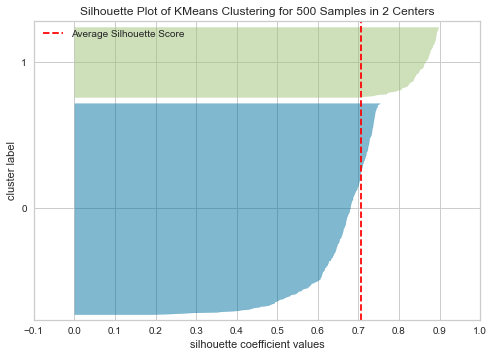

Silhouette Score for number of clusters as:  3


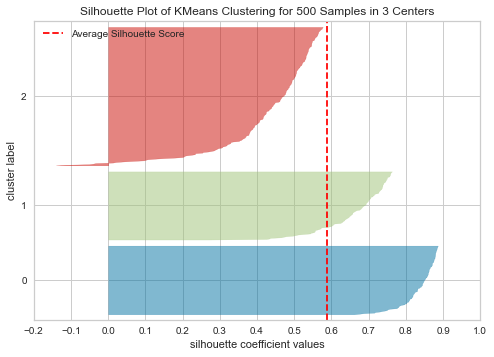

Silhouette Score for number of clusters as:  4


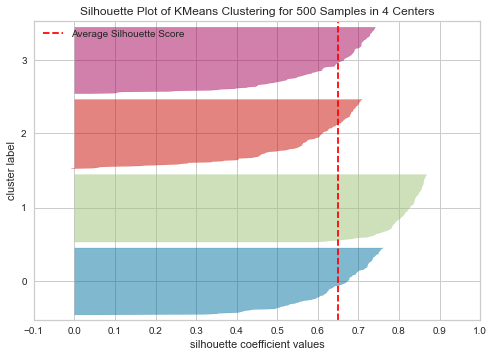

Silhouette Score for number of clusters as:  5


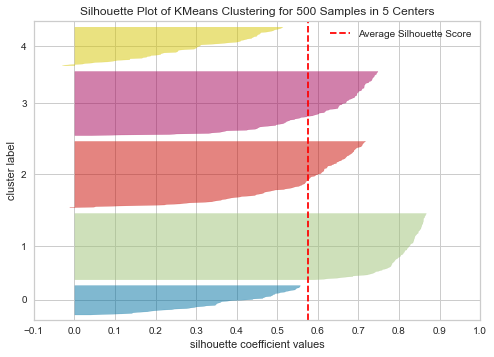

Silhouette Score for number of clusters as:  6


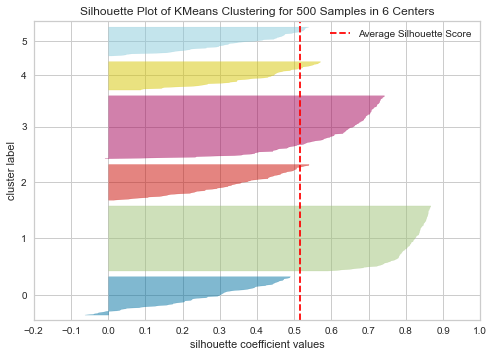

Silhouette Score for number of clusters as:  7


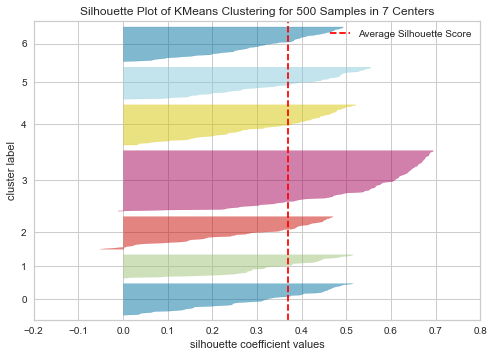

Silhouette Score for number of clusters as:  8


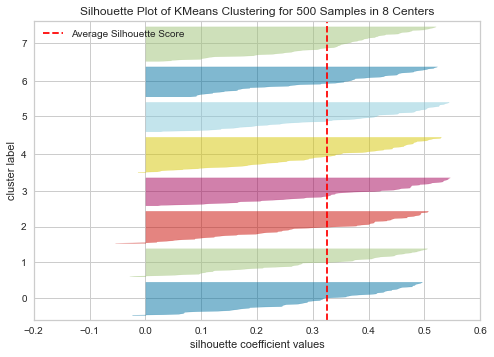

Silhouette Score for number of clusters as:  9


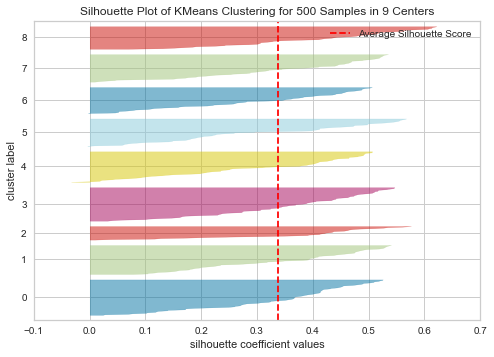

In [7]:
## here you can see the number of clusters as 2 is giving good score
## but lets see how many negative or false values we got

from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,10):
    cluster = KMeans(n_clusters=i)
    visualiser = SilhouetteVisualizer(cluster,colors='yellowbrick')
    visualiser.fit(X)
    print("Silhouette Score for number of clusters as: ",i)
    visualiser.show()


    ## in the graphs below you can see when we are taking the number of clusters as 3:
    ## there are some negative values also
    ## that means they are wrongly classified
    ## so we will not use that number of clusters